# Games decomposition - computation

## Structural operations
- We need to build two matrices (linear maps)
- Given the skeleton of a game (number of players $N$ and number of action profiles $A = \prod_i A_i$), these matrices can be built *once*, stored and re-used
- Recall that the response graph has $A$ nodes and $E = \frac{A}{2}\sum_{i \in \mathcal{N}}(A_i - 1)$ edges

### Build:

1. Map from games to flows: $D: \mathbb{R}^{AN} \to \mathbb{R}^E$; matrix $E \times AN$
2. Projection from flows onto exact flows $e: \mathbb{R}^E \to \mathbb{R}^E$; matrix $E \times E$






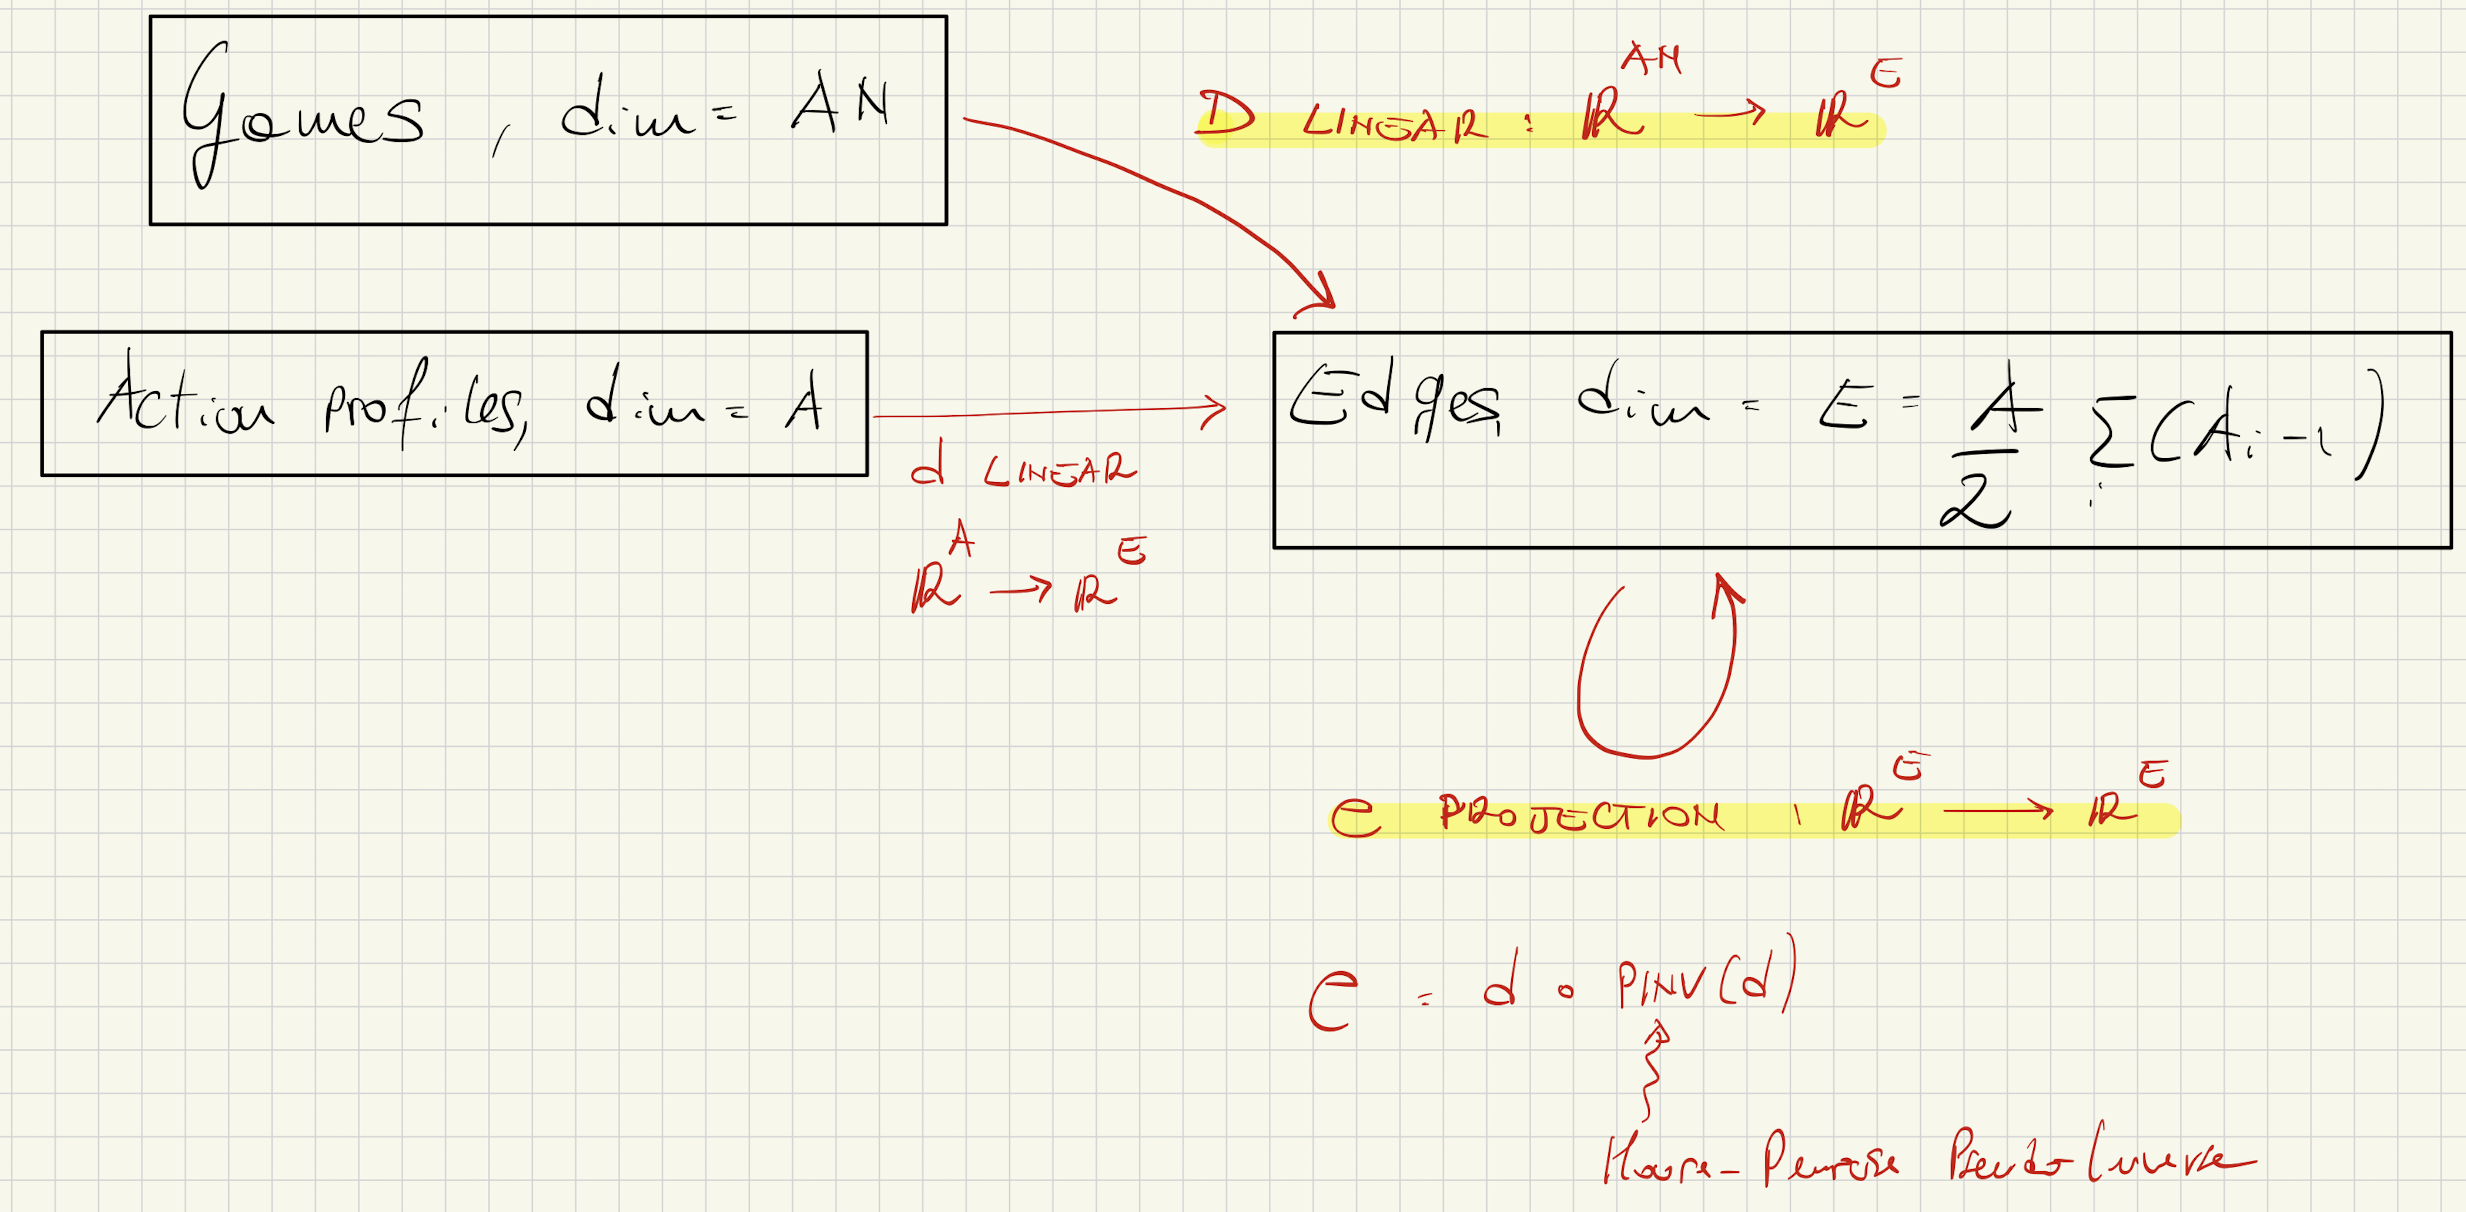




## 1. Map $D$ from games to flows $[E \times AN]$

### Algorithm to build $[E \times AN]$ matrix (depends on choice of basis)

In [1]:
    def make_pwc_matrix(self):
        """Matrix of D: games --> flows"""
        A = np.zeros([int(self.dim_C1), int(self.dim_C0N)])

        for row in range(int(self.dim_C1)):
            edge = self.edges[row]
            i = different_index(edge)

            minus_column = self.payoff_basis.index((i, edge[0]))
            plus_column = self.payoff_basis.index((i, edge[1]))
            A[row][minus_column] = -1
            A[row][plus_column] = +1

        return A

### Example: $9 \times 12$ matrix in $2 \times 3$ game

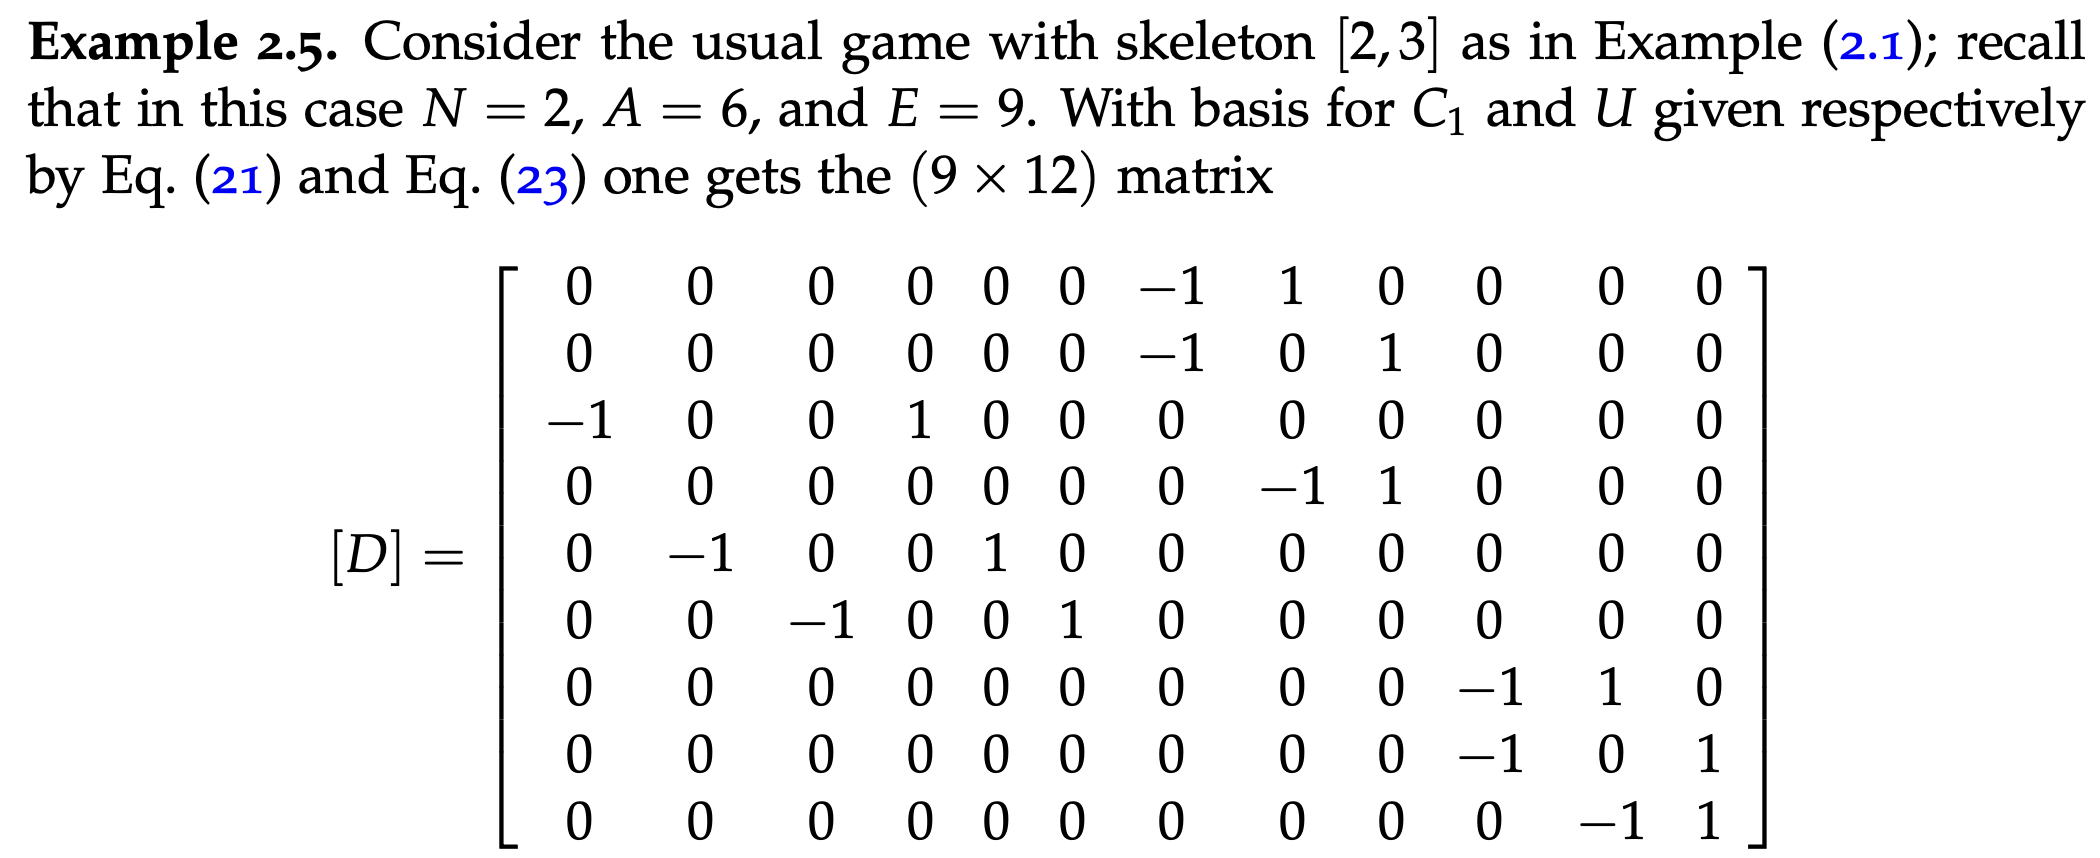

## 2. Projection onto exact flows $[E \times E]$
This requires building the $E \times A$ matrix $d$ from nodes to flows, and composing it with its Moore-Penrose pseudo-inverse

### 2.1 Algorithm to build $[E \times A]$ matrix (depends on choice of basis)

```python
    def make_coboundary_0_matrix(self):
        """Matrix of d: nodes --> flows"""

        # Start with transpose
        A = np.zeros([int(self.dim_C1), int(self.dim_C0)])

        for row in range(int(self.dim_C1)):
            basis_edge = self.edges[row]

            minus_node, plus_node = basis_edge
            minus_column = self.nodes.index(minus_node)
            plus_column = self.nodes.index(plus_node)
            A[row][minus_column] = -1
            A[row][plus_column] = +1

        return A
```

### 2.2 Compute MP pseudoinverse $[A \times E]$ using `numpy.linalg.pinv`

```python
# pinv of d: flows --> nodes
self.coboundary_0_matrix_pinv = npla.pinv(self.coboundary_0_matrix)
```

### 2.3 Compose with pseudo-inverse: Matrix-matrix multiplication $[E \times A] \cdot [A \times E] = [E \times E]$ using `numpy.matmul`

```python
# e: flows --> fows projection onto exact flows
self.exact_projection = np.matmul(
    self.coboundary_0_matrix, self.coboundary_0_matrix_pinv
)
```

---

## Dynamic operations: two matrix-vector multiplications
- Fixed the skeleton, these are the operations to be performed to decompose a payoff instance into potential and harmonic parts
- For a fixed skeleton, a payoff instance is a vector $u$ in $\mathbb{R}^{AN}$

### 1. Matrix-vector multiplication: $u \mapsto Du \in \mathbb{R}^E$
- here $D: \mathbb{R}^{AN} \to \mathbb{R}^E$ is the map from games to flows built in point 1 above
### 2. Matrix-vector multiplication $Du \mapsto eDu \in \mathbb{R}^E$
- here $e: \mathbb{R}^E \to \mathbb{R}^E$ is the projection onto exact flows built in point 2 above

---